## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

## Boston house prices dataset w/ LinearRegression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)
print(boston.keys())

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
print("feature:", boston.feature_names)
print("shape:", boston.data.shape, boston.target.shape)

feature: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
shape: (506, 13) (506,)


In [4]:
X = boston.data[:, np.newaxis, 2]
X.shape

(506, 1)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.3, random_state=4)
regr = LinearRegression()
regr.fit(x_train, y_train)
print("Cross-validation: ", cross_val_score(regr, x_train, y_train, cv=5).mean())
y_pred = regr.predict(x_test)

Cross-validation:  0.24540318917291493


In [6]:
print(boston.data.shape, x_train.shape, x_test.shape)
print(boston.target.shape, y_train.shape, y_test.shape)
print(y_pred.shape)

(506, 13) (354, 1) (152, 1)
(506,) (354,) (152,)
(152,)


In [7]:
print('Coefficients: ', regr.coef_)
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("R2 : %.2f" % r2_score(y_test, y_pred))

Coefficients:  [-0.6312487]
MSE: 84.55
MAE: 6.29
R2 : 0.19


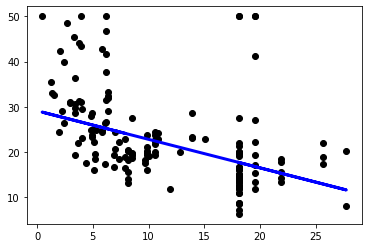

In [8]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()

## Wine recognition dataset w/ LogisticRegression

In [9]:
wine = datasets.load_wine()
print(wine.DESCR)
print(wine.keys())

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [10]:
print("feature:", wine.feature_names)
print("shape:", wine.data.shape, wine.target.shape)

feature: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
shape: (178, 13) (178,)


In [11]:
X = wine.data[:, np.newaxis, 2]
X.shape

(178, 1)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, wine.target, test_size=0.1, random_state=4)
regr = LogisticRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

/home/ziv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ziv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [13]:
print(wine.data.shape, x_train.shape, x_test.shape)
print(wine.target.shape, y_train.shape, y_test.shape)
print(y_pred.shape)

(178, 13) (160, 1) (18, 1)
(178,) (160,) (18,)
(18,)


In [14]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.4444444444444444
